Sample of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


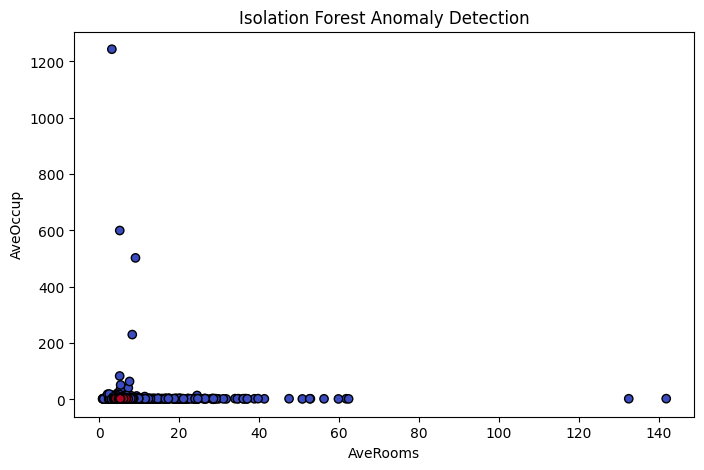

Anomaly counts (default contamination=0.1):
anomaly
 1    18576
-1     2064
Name: count, dtype: int64
Unit test passed.
Contamination=0.01: Anomalies detected = 207
Contamination=0.05: Anomalies detected = 1032
Contamination=0.1: Anomalies detected = 2064


...
----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


Contamination=0.2: Anomalies detected = 4128


In [1]:
# Install required package if not already installed
try:
    import sklearn
except ImportError:
    print("scikit-learn not found. Run: pip install scikit-learn")

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import IsolationForest

# Load dataset with error handling
def load_dataset():
    try:
        data = fetch_california_housing()
        X = pd.DataFrame(data.data, columns=data.feature_names)
        print("Sample of the dataset:")
        print(X.head())
        return X
    except Exception as e:
        print("Failed to load dataset:", e)
        return pd.DataFrame()

def run_isolation_forest(data, contamination=0.1, random_state=42):
    """
    Fit Isolation Forest model and return predictions.
    """
    try:
        if not isinstance(data, pd.DataFrame):
            raise ValueError("Input data must be a pandas DataFrame.")
        if data.shape[0] == 0:
            raise ValueError("Input data is empty.")
        model = IsolationForest(contamination=contamination, random_state=random_state)
        model.fit(data)
        return model.predict(data)
    except Exception as e:
        print(f"Error in Isolation Forest: {e}")
        return None

def plot_anomalies(X, feature1='AveRooms', feature2='AveOccup'):
    try:
        plt.figure(figsize=(8, 5))
        plt.scatter(X[feature1], X[feature2], c=X['anomaly'], cmap='coolwarm', edgecolor='k')
        plt.xlabel(f'{feature1}')
        plt.ylabel(f'{feature2}')
        plt.title('Isolation Forest Anomaly Detection')
        plt.show()
    except Exception as e:
        print(f"Error during plotting: {e}")

# Main execution
X = load_dataset()
if not X.empty:
    X['anomaly'] = run_isolation_forest(X, contamination=0.1)
    plot_anomalies(X)
    print("Anomaly counts (default contamination=0.1):")
    print(X['anomaly'].value_counts())

    # Unit test using unittest
    import unittest

    class TestIsolationForest(unittest.TestCase):
        def test_anomaly_column_exists(self):
            self.assertIn('anomaly', X.columns)
        def test_anomaly_label_values(self):
            self.assertTrue(set(X['anomaly']).issubset({-1, 1}))
        def test_data_not_empty(self):
            self.assertTrue(len(X) > 0)

    def test_run_isolation_forest():
        test_data = X.drop(columns='anomaly').copy()
        preds = run_isolation_forest(test_data, contamination=0.05)
        assert preds is not None, "Predictions should not be None"
        assert len(preds) == len(test_data), "Length mismatch"
        assert set(preds).issubset({-1, 1}), "Invalid labels"
        print("Unit test passed.")

    test_run_isolation_forest()

    # Try multiple contamination levels
    for contamination in [0.01, 0.05, 0.1, 0.2]:
        preds = run_isolation_forest(X.drop(columns='anomaly'), contamination)
        if preds is not None:
            print(f"Contamination={contamination}: Anomalies detected = {(preds == -1).sum()}")

    if __name__ == "__main__":
        unittest.main(argv=[''], exit=False)